In [20]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests 
import re

from selenium import webdriver

from time    import sleep , time 
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비 
import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml 
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer , load_digits

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz

from   sklearn.ensemble        import RandomForestClassifier , VotingClassifier

from   sklearn.linear_model    import LogisticRegression

from   sklearn.svm             import SVC 

from   sklearn.neighbors        import KNeighborsClassifier

from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , precision_recall_curve  ,  roc_curve , roc_auc_score  
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler , Binarizer
from   sklearn.impute          import SimpleImputer

from   sklearn.base            import BaseEstimator

from   IPython.display import Image

sklearn.__version__

'0.24.2'

#### Ensemble 학습

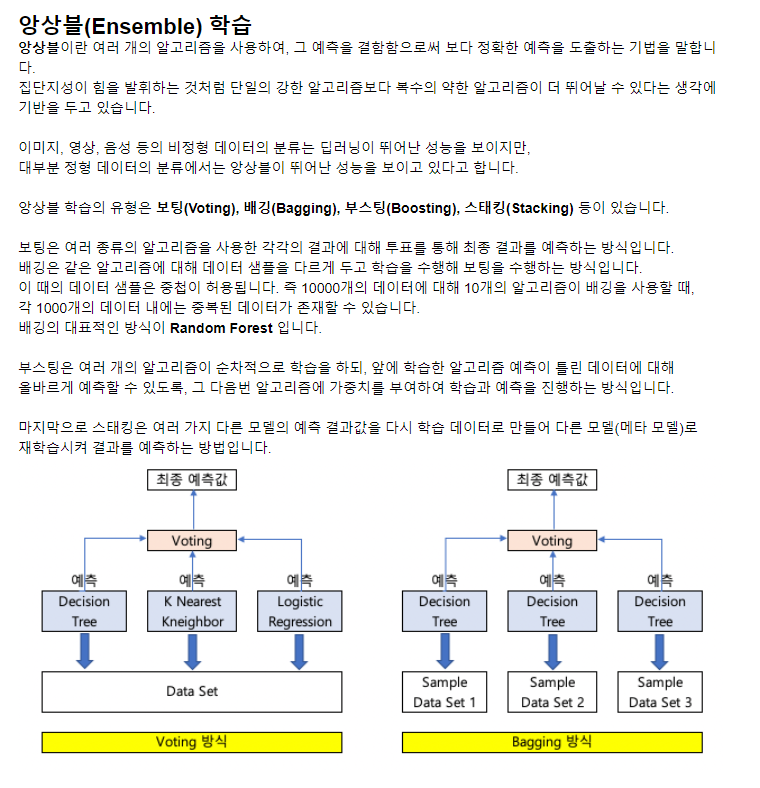

In [2]:
Image('c:/img/img/ensemble-01.png' , width = 700)

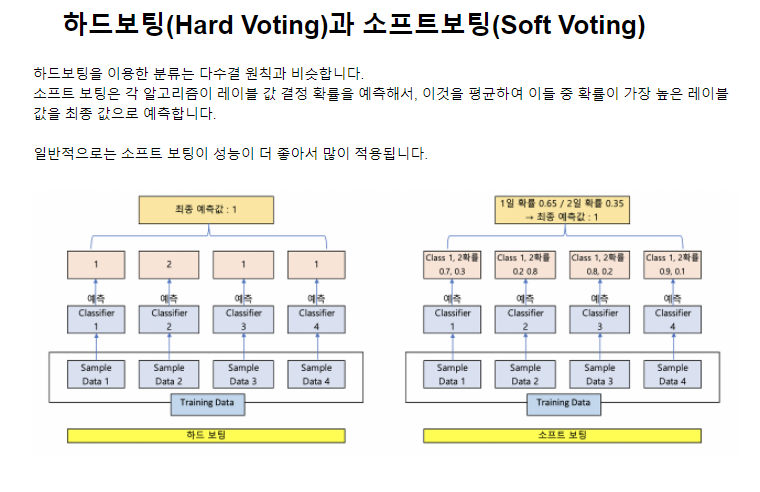

In [3]:
Image('c:/img/img/ensemble-02.png' , width = 700)

#### Voting

In [7]:
mnist = load_digits()
print('type - ' , type(mnist) )
print('keys - ' , mnist.keys())

type -  <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [9]:
features , labels = mnist.data , mnist.target

In [10]:
features.shape , labels.shape

((1797, 64), (1797,))

In [13]:
features[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [14]:
labels[1]

1

In [15]:
features[1].reshape(8,8)

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

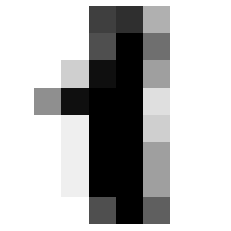

In [17]:
plt.imshow(features[1].reshape(8,8), cmap = matplotlib.cm.binary)


plt.axis('off')
plt.show()
plt.close()


In [18]:
X_train , X_test , y_train , y_test = train_test_split(features , 
                                                       labels , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

In [23]:
tree_model = DecisionTreeClassifier(criterion    = 'entropy' , 
                                    max_depth    = 8 , 
                                    max_features = 32 , 
                                    random_state = 35)
knn_model  = KNeighborsClassifier(n_neighbors = 299 )
svm_model  = SVC(probability = True ) 

In [24]:
def metrics_evaluation(target , prediction) :
    print('accuracy \n'    , accuracy_score(target , prediction))
    

In [25]:
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test) 

knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test) 

svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test) 


In [27]:
metrics_evaluation(y_test , tree_pred)
metrics_evaluation(y_test , knn_pred)
metrics_evaluation(y_test , svm_pred)

accuracy 
 0.8694444444444445
accuracy 
 0.8555555555555555
accuracy 
 0.9916666666666667


In [28]:
print('VotingClassifier hardVoting - ')
print()

hard_voting_model = VotingClassifier( estimators = [('tree' , tree_model),('knn' , knn_model) , ('svm' , svm_model)] , 
                                      weights    = [1,1,1] , 
                                      voting     = 'hard' ) 



VotingClassifier hardVoting - 



In [29]:
hard_voting_model.fit(X_train , y_train) 
hard_voting_pred = hard_voting_model.predict(X_test) 
metrics_evaluation(y_test , hard_voting_pred)


accuracy 
 0.9611111111111111


In [30]:
soft_voting_model = VotingClassifier( estimators = [('tree' , tree_model),('knn' , knn_model) , ('svm' , svm_model)] , 
                                      weights    = [1,1,1] , 
                                      voting     = 'soft' ) 

soft_voting_model.fit(X_train , y_train) 
soft_voting_pred = soft_voting_model.predict(X_test) 
metrics_evaluation(y_test , soft_voting_pred)


accuracy 
 0.9388888888888889


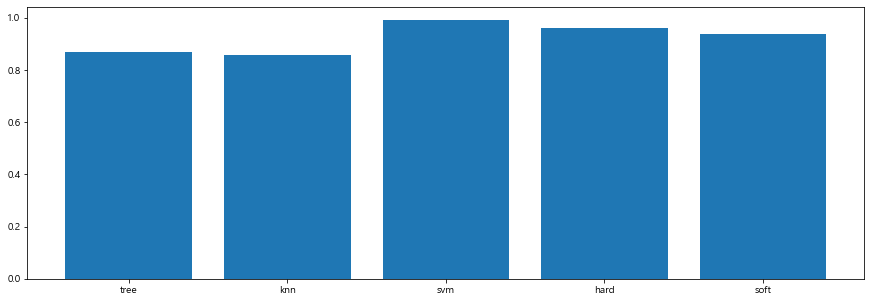

In [36]:
plt.figure( figsize = (15,5))

x = np.arange(5)

plt.bar(x , height = [
    accuracy_score(y_test , tree_pred) , 
    accuracy_score(y_test , knn_pred) , 
    accuracy_score(y_test , svm_pred) , 
    accuracy_score(y_test , hard_voting_pred) , 
    accuracy_score(y_test , soft_voting_pred) , 
])
plt.xticks(x , ['tree' , 'knn' , 'svm' , 'hard' , 'soft'])

plt.show()
plt.close()

In [39]:
print('데이터를 활용한 앙상블 [실습] - 시각화 ')

cancer = load_breast_cancer()
cancer.keys()

데이터를 활용한 앙상블 [실습] - 시각화 


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [47]:
tree_model     = DecisionTreeClassifier()
knn_model      = KNeighborsClassifier()
svm_model      = SVC(probability = True ) 
logistic_model = LogisticRegression() 


hard_voting_model = VotingClassifier( estimators = [('tree' , tree_model),('knn' , knn_model) , ('svm' , svm_model) , ('logistic' , logistic_model)] , 
                                      weights    = [1,1,1,1] , 
                                      voting     = 'hard' ) 

soft_voting_model = VotingClassifier( estimators = [('tree' , tree_model),('knn' , knn_model) , ('svm' , svm_model) , ('logistic' , logistic_model)] , 
                                      weights    = [1,1,1,1] , 
                                      voting     = 'soft' ) 



In [48]:
X_train , X_test , y_train , y_test = train_test_split(cancer.data , 
                                                       cancer.target , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)

X_train.shape , X_test.shape , y_train.shape , y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [51]:
estimators = [tree_model , knn_model , svm_model, hard_voting_model , soft_voting_model ]
for e in estimators : 
    e.fit(X_train , y_train)
    pred = e.predict(X_test) 
    print(e.__class__.__name__ , '\t' , accuracy_score(y_test , pred) )
    

DecisionTreeClassifier 	 0.9473684210526315
KNeighborsClassifier 	 0.9473684210526315
SVC 	 0.9473684210526315
VotingClassifier 	 0.9649122807017544
VotingClassifier 	 0.9736842105263158


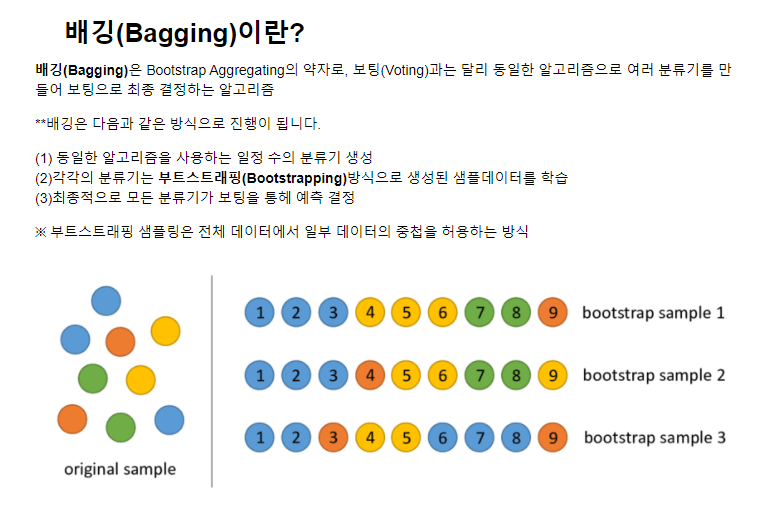

In [52]:
Image('c:/img/img/rf-01.png' , width = 700)

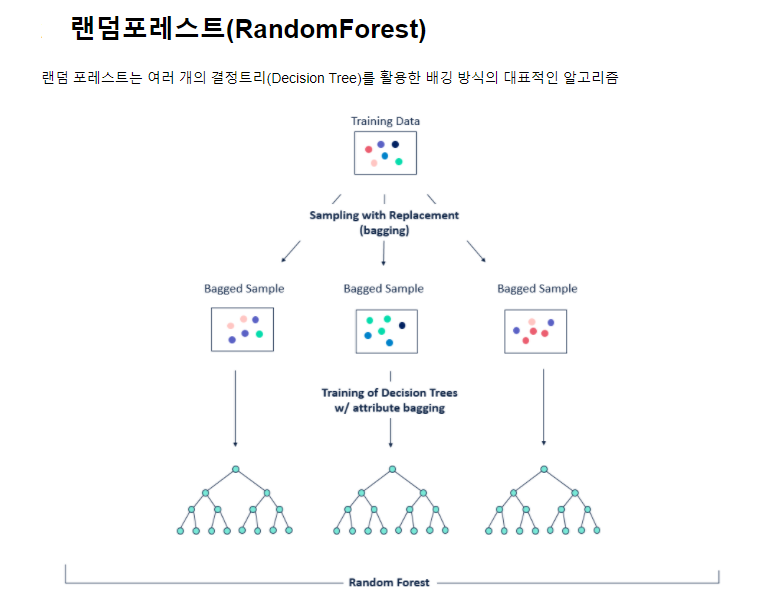

In [53]:
Image('c:/img/img/rf-02.png' , width = 700)

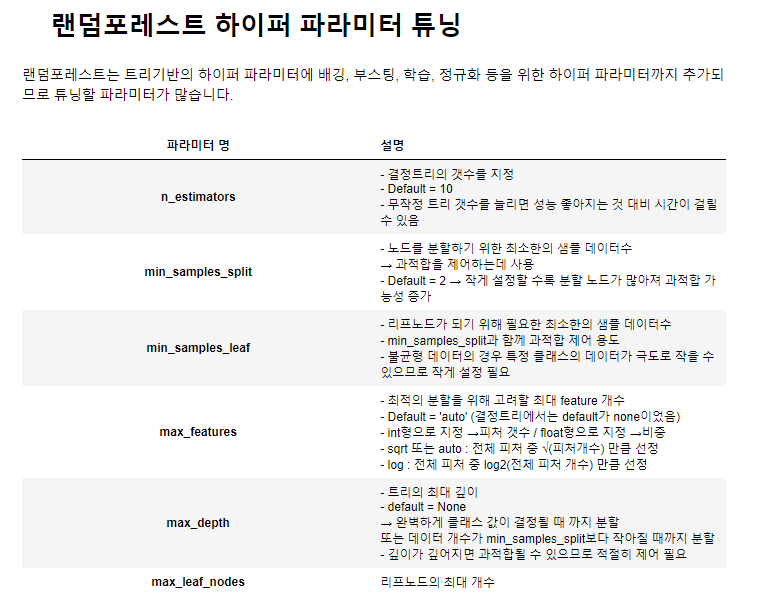

In [54]:
Image('c:/img/img/rf-03.png' , width = 700)

In [55]:
mnist = load_digits()
print('type - ' , type(mnist) )
print('keys - ' , mnist.keys())

features , labels = mnist.data , mnist.target

print('shape - ' , features.shape , labels.shape)

type -  <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
shape -  (1797, 64) (1797,)


In [63]:
def user_cross_val(e , features , labels ) :
    cv_scores = []
    
    for idx in range(10) :
        score = cross_val_score(e , features , labels , cv = 10 , scoring = 'accuracy')
        # print(score)
        cv_scores.append( score.mean() )
    
    return cv_scores

In [64]:
tree_cv_scores    =  user_cross_val(DecisionTreeClassifier() , features , labels)
print('*' * 50)
bagging_cv_scores =  user_cross_val(RandomForestClassifier() , features , labels)



**************************************************


In [69]:
print('tree score - ')
print(tree_cv_scores)
print()
print('tree score mean - ')
print(np.mean(tree_cv_scores))
print()
print('bagging - ')
print('bagging score - ')
print(bagging_cv_scores)
print()
print('bagging score mean - ')
print(np.mean(bagging_cv_scores))

tree score - 
[0.8263625077591558, 0.8336064556176288, 0.8280229671011794, 0.8369180633147113, 0.8291185599006828, 0.8324984481688393, 0.8302576039726878, 0.8313935443823712, 0.8330446927374302, 0.82024208566108]

tree score mean - 
0.8301464928615767

bagging - 
bagging score - 
[0.9493451272501551, 0.9532495344506516, 0.951024208566108, 0.9493575418994412, 0.9493482309124767, 0.9543637492240844, 0.9454593420235877, 0.9532557417752947, 0.951582867783985, 0.9471291123525759]

bagging score mean - 
0.950411545623836


In [70]:
tree_bagging_frm = pd.DataFrame({
    'tree'    : tree_cv_scores , 
    'bagging' : bagging_cv_scores
})
tree_bagging_frm

,tree,bagging
0,0.826363,0.949345
1,0.833606,0.953250
2,0.828023,0.951024
3,0.836918,0.949358
4,0.829119,0.949348
5,0.832498,0.954364
6,0.830258,0.945459
7,0.831394,0.953256
8,0.833045,0.951583
9,0.820242,0.947129


<AxesSubplot:>

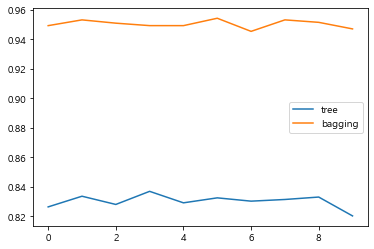

In [71]:
tree_bagging_frm.plot()

- human_activity 데이터를 이용한 배깅 [실습]

In [74]:
feature_names = pd.read_csv('./ml-data/human_activity/features.txt' , 
                            header = None , 
                            names  = ['feature_name'])
feature_names

,feature_name
0,tBodyAcc-Mean-1
1,tBodyAcc-Mean-2
2,tBodyAcc-Mean-3
3,tBodyAcc-STD-1
4,tBodyAcc-STD-2
...,...
556,tBodyGyro-AngleWRTGravity-1
557,tBodyGyroJerk-AngleWRTGravity-1
558,tXAxisAcc-AngleWRTGravity-1
559,tYAxisAcc-AngleWRTGravity-1


- train data

In [84]:
X_train = pd.read_csv('./ml-data/human_activity/Train/X_train.txt' , 
                      header = None , 
                      sep    = '\s+')
X_train.columns = feature_names.loc[ :  , 'feature_name']
X_train

feature_name,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,0.267874,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,0.181271,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,0.113141,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,0.166671,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


In [86]:
y_train = pd.read_csv('./ml-data/human_activity/Train/y_train.txt' , 
                      header = None , 
                      sep    = '\s+' , 
                      names  = ['target'])
y_train

,target
0,5
1,5
2,5
3,5
4,5
...,...
7762,2
7763,2
7764,2
7765,2


- test data

In [87]:
'''
[가이드]
- 결측값 확인
- 타켓의 분포에 따른 다른 평가지표를 사용할 수 도 있다. - 확인
- tree_model = DecisionTreeClassifier() , tree_model.get_params() 
- GridSerachCV 교차검증 및 하이퍼 파라미터 튜닝

[bagging - randomforest] 
- 모델의 파라미터 확인
- GridSerachCV 교차검증 및 하이퍼 파라미터 튜닝
- 피처의 중요도 20개 시각화 - 

[voting - ] 
- hard, soft 
'''

'\n[가이드]\n- 결측값 확인\n- 타켓의 분포에 따른 다른 평가지표를 사용할 수 도 있다. - 확인\n- tree_model = DecisionTreeClassifier() , tree_model.get_params() \n- GridSerachCV 교차검증 및 하이퍼 파라미터 튜닝\n\n[bagging - randomforest] \n- 모델의 파라미터 확인\n- GridSerachCV 교차검증 및 하이퍼 파라미터 튜닝\n- 피처의 중요도 20개 시각화 - \n\n[voting - ] \n- hard, soft \n'